In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from keras.optimizers import Adam
from keras import models as tf_models, layers
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
import warnings
warnings.filterwarnings("ignore")


In [2]:
train_data_dir = r'D:\Git Projects\Peppermint-Identification-and-Classification-Model\Classification\Data\train'
validation_data_dir = r'D:\Git Projects\Peppermint-Identification-and-Classification-Model\Classification\Data\validation'
test_data_dir = r'D:\Git Projects\Peppermint-Identification-and-Classification-Model\Classification\Data\test'

In [3]:
bs = 32
iz = 224

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)

test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)

Found 3729 files belonging to 3 classes.
Found 797 files belonging to 3 classes.
Found 797 files belonging to 3 classes.


In [4]:
class_names = train_generator.class_names
print(class_names)

['Dried', 'Fresh', 'Spoiled']


In [5]:
model_name = "VGG16"
epochs = 10
desired_steps_per_epoch = 30

num_classes = len(train_generator.class_names)

base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

base_model_vgg16.trainable = False

model_vgg16 = tf_models.Sequential(
[
    base_model_vgg16,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
)




Epoch 1/10


117/117 [==============================] - 865s 7s/step - loss: 0.6246 - accuracy: 0.8107 - val_loss: 0.1479 - val_accuracy: 0.9498
Epoch 2/10
117/117 [==============================] - 760s 7s/step - loss: 0.1690 - accuracy: 0.9356 - val_loss: 0.0936 - val_accuracy: 0.9762
Epoch 3/10
117/117 [==============================] - 885s 8s/step - loss: 0.1252 - accuracy: 0.9517 - val_loss: 0.0901 - val_accuracy: 0.9674
Epoch 4/10
117/117 [==============================] - 464s 4s/step - loss: 0.0860 - accuracy: 0.9702 - val_loss: 0.0542 - val_accuracy: 0.9862
Epoch 5/10
117/117 [==============================] - 915s 8s/step - loss: 0.0640 - accuracy: 0.9799 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 6/10
117/117 [==============================] - 644s 5s/step - loss: 0.0543 - accuracy: 0.9820 - val_loss: 0.0477 - val_accuracy: 0.9824
Epoch 7/10
117/117 [==============================] - 257s 2s/step - loss: 0.0424 - accuracy: 0.9839 - val_loss: 0.0511 - val_accuracy: 0

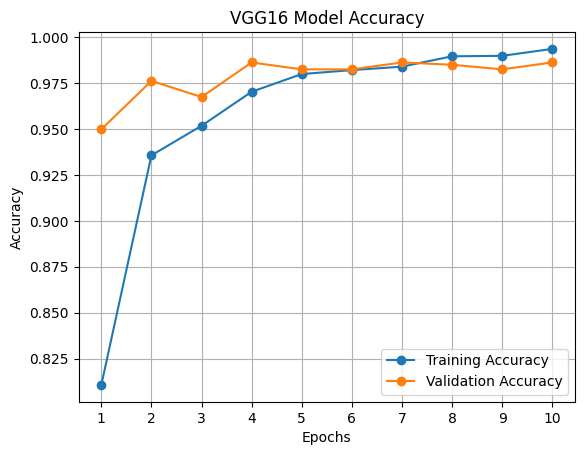

In [6]:
train_accuracy_vgg16 = history_vgg16.history['accuracy']
val_accuracy_vgg16 = history_vgg16.history['val_accuracy']

epochs_range = range(1, len(train_accuracy_vgg16) + 1)

plt.plot(epochs_range, train_accuracy_vgg16, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy_vgg16, label='Validation Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'{model_name} Model Accuracy')
plt.legend()

plt.xticks(range(1, len(train_accuracy_vgg16) + 1))

plt.grid(True)
plt.show()


In [7]:
vgg16_testing_scores = model_vgg16.evaluate(test_generator)
vgg16_testing_accuracy = vgg16_testing_scores[1]


25/25 [==============================] - 41s 2s/step - loss: 0.0529 - accuracy: 0.9774


Testing Accuracy (VGG16): 0.9774153232574463
F1 Score (VGG16): 0.977344391363462
Classification Report (VGG16):
               precision    recall  f1-score   support

       Dried       0.98      1.00      0.99       282
       Fresh       0.97      0.98      0.97       265
     Spoiled       0.98      0.95      0.97       250

    accuracy                           0.98       797
   macro avg       0.98      0.98      0.98       797
weighted avg       0.98      0.98      0.98       797



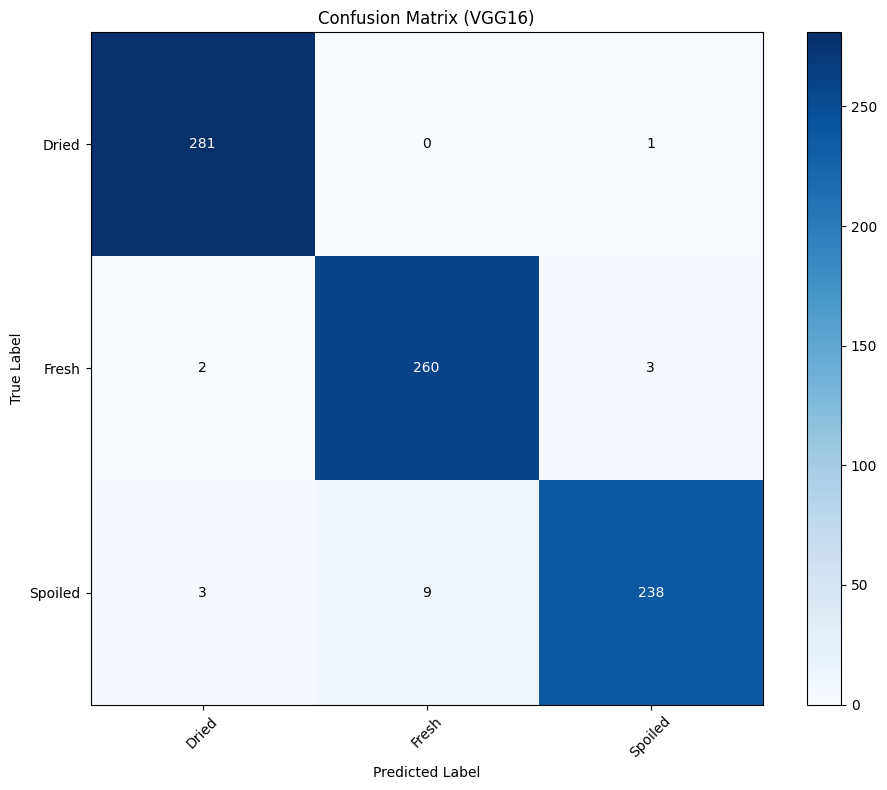

In [8]:
vgg16_y_true = []
vgg16_y_pred = []
for images, labels in test_generator:
    predictions = model_vgg16.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    vgg16_y_true.extend(labels.numpy())
    vgg16_y_pred.extend(predicted_labels.numpy())

vgg16_confusion_matrix = confusion_matrix(vgg16_y_true, vgg16_y_pred, labels=range(num_classes))

vgg16_f1_score = f1_score(vgg16_y_true, vgg16_y_pred, average='weighted')

vgg16_classification_report = classification_report(vgg16_y_true, vgg16_y_pred, target_names=class_names)

print("Testing Accuracy (VGG16):", vgg16_testing_accuracy)
print("F1 Score (VGG16):", vgg16_f1_score)
print("Classification Report (VGG16):\n", vgg16_classification_report)

plt.figure(figsize=(10, 8))
plt.imshow(vgg16_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (VGG16)')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

thresh = vgg16_confusion_matrix.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(vgg16_confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if vgg16_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [9]:
model_vgg16.save('Peppermint_Classes_Premodel.h5')